In [1]:
%matplotlib inline

from pathlib import Path
import sys
sys.path.append("..")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipyvolume as ipv

/home/hadim/local/conda/envs/ws/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
def viz_dimers(dimers, start_row=0, grid=True):
    fig, ax = plt.subplots(figsize=(30, 20))
    #extent = [0, dimers.shape[1], 0, dimers.shape[0]]
    ax.imshow(dimers, interpolation='none', aspect='equal', cmap='tab10')
    if grid:
        ax.set_xticks(np.arange(start_row - 0.5, dimers.shape[1] - 0.5), minor=True)
        ax.set_yticks(np.arange(-0.5, dimers.shape[0] - 0.5), minor=True)
        ax.grid(which='minor', color='black', alpha=0.4)

        ax.set_xlim(start_row - 0.5, dimers.shape[1] - 0.5)
        ax.set_ylim(-0.5, dimers.shape[0] - 0.5)
    return fig


def generate_tapers(dimers, min_dimer, max_dimer):
    n_pf = dimers.shape[0]
    missing_dimers = np.random.randint(0, 30, size=(n_pf,))
    for pf, missing_n in zip(dimers, missing_dimers):
        if missing_n > 0:
            pf[-missing_n:] = 0
    return dimers


def viz_dimer_positions(positions, use_ipv=True):
    x, y, z = positions[['x', 'y', 'z']].values.astype('float').T
    
    if use_ipv:
        ipv.figure(height=400, width=800)
        ipv.quickscatter(x, y, z, size=5,  marker='sphere', color='#e4191b')
        ipv.squarelim()
        ipv.show()
    else:
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure(figsize=(20, 20))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x, y, z, c='#e4191b', marker='o')

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

In [3]:
n_pf = 13
n_rows = 200

dimers = np.ones((n_pf, n_rows))
dimers = generate_tapers(dimers, 0, 25)

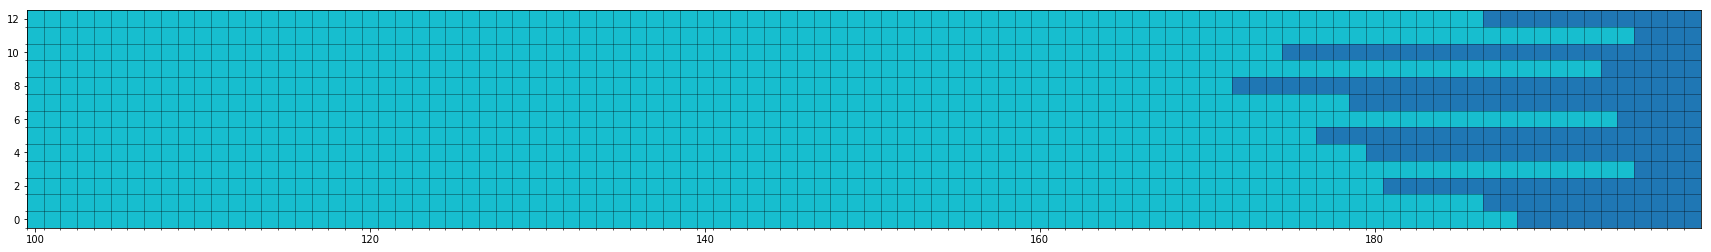

In [4]:
_ = viz_dimers(dimers, start_row=100, grid=True)

In [5]:
positions = []

for row_index in range(dimers.shape[1]):
    datum = {}
    datum['row'] = row_index
    datum['pf'] = 0
    datum['x'] = np.random.randint(0, 200)
    datum['y'] = np.random.randint(0, 400)
    datum['z'] = np.random.randint(0, 200)
    
    
    
    positions.append(datum)
positions = pd.DataFrame(positions)

In [6]:
viz_dimer_positions(positions, use_ipv=True)